In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
!pip install plot_metric
from plot_metric.functions import BinaryClassification 
from sklearn.metrics import confusion_matrix,roc_auc_score,plot_roc_curve

In [2]:
df=pd.read_excel("Default - credit card clients.xlsx")

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


1.Limit Balance: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

2.SEX: Gender (1 = male; 2 = female).

3.Education:  (1 = graduate school; 2 = university; 3 = high school; 4 = others).

4.Marital status: (1 = married; 2 = single; 3 = others).

5.Age:  (year).










for the binary variable, default payment (Yes = 1, No = 0), are the response variables.

The measurement scale for the repayment status is: 
                                           -1 = pay duly; 
                                            1 = payment delay for one month; 
                                            2 = payment delay for two months;
                                            3 = payment delay for three months;
                                            4 = payment delay for four months
                                            5 = payment delay for five months
                                            6 = payment delay for six months
                                            7 = payment delay for seven months
                                            8 = payment delay for eight months
                                            9 = payment delay for nine months

6.PAY0 - PAY6: History of past payment.  the past monthly payment records (from April to September, 2005) as follows: 
                                            PAY_0 = the repayment status in September, 2005; 
                                            PAY_2 = the repayment status in August, 2005. 
                                            PAY_3 =the repayment status in July, 2005. 
                                            PAY_4 =the repayment status in June, 2005. 
                                            PAY_5 =the repayment status in May, 2005. 
                                            PAY_6 = the repayment status in April, 2005. 

7.BILL_AMT1 - BILL_AMT6: Amount of bill statement (NT dollar). 
                                    BILL_AMT1 = amount of bill statement in September, 2005; 
                                    BILL_AMT2 = amount of bill statement in August, 2005;
                                    BILL_AMT3 = amount of bill statement in July, 2005
                                    BILL_AMT4 = amount of bill statement in June, 2005;
                                    BILL_AMT5 = amount of bill statement in May, 2005;
                                    BILL_AMT6 = amount of bill statement in April, 2005;

8.PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). 
                                    PAY_AMT1 = amount paid in September, 2005; 
                                    PAY_AMT2 = amount paid in August, 2005;
                                    PAY_AMT3 = amount paid in July, 2005
                                    PAY_AMT4 = amount paid in June, 2005;
                                    PAY_AMT5 = amount paid in statement in May, 2005;
                                    PAY_AMT6 = amount paid in statement in April, 2005;

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Lets have a look from pay 0 to pay 6

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

There are no null values present in the data set

In [7]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

there are more number of single and unmarried people when compared to other martial status.there is another value present which is 0 . to prevent the loss of info we can convert it to 3 which represents other martial status

In [8]:
df['MARRIAGE']=df['MARRIAGE'].replace(0,3)

In [9]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

The 0's have been converted to 3's

In [10]:
df['PAY_5'].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

there is another value -2 for the payment due. I would consider it to be no payment in due for that month.

<AxesSubplot:>

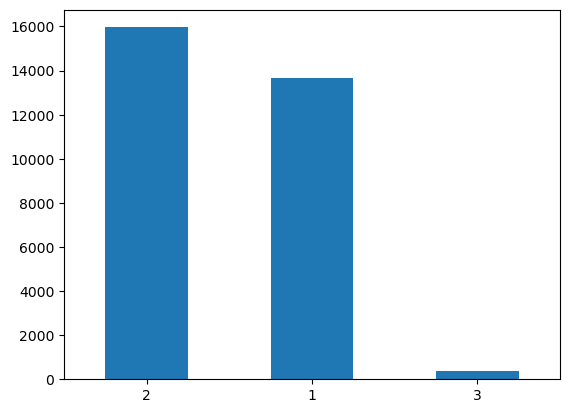

In [11]:
df["MARRIAGE"].value_counts().plot(kind='bar',rot=0)

Check for the number of defaulters and non defaulters in the dataset


<AxesSubplot:>

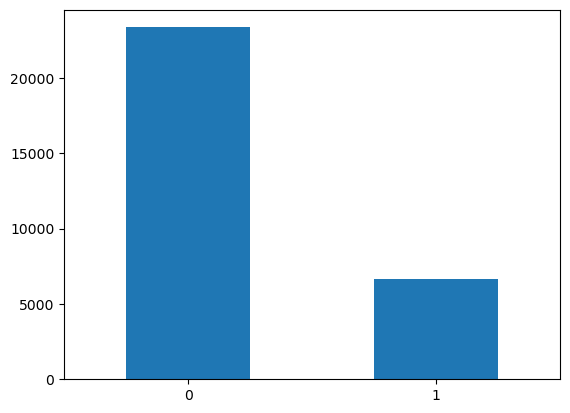

In [12]:
df["default payment next month"].value_counts().plot(kind='bar',rot=0)

In [13]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

nearly 25% of the id's in the data are defaulter's

In [14]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

<AxesSubplot:xlabel='SEX,default payment next month'>

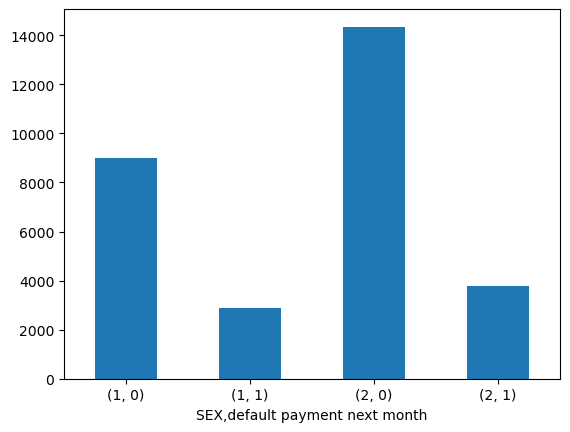

In [15]:
df['default payment next month'].groupby(df["SEX"]).value_counts().plot(kind='bar',rot=0)

In [16]:
df['default payment next month'].groupby(df["SEX"]).value_counts()

SEX  default payment next month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
Name: default payment next month, dtype: int64

% of men defaulted when compared to women is higher

In [17]:
#check for the max and min ages
df['AGE'].max(),df['AGE'].min()

(79, 21)

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

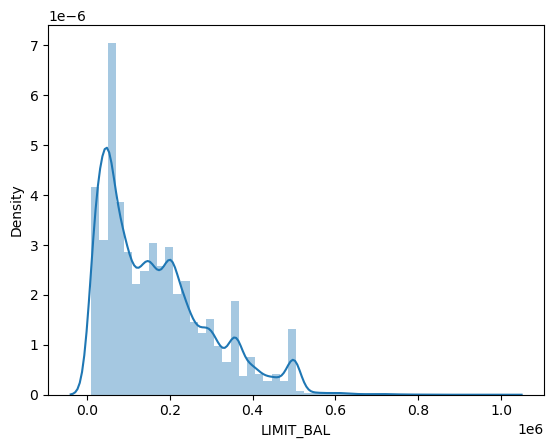

In [18]:
sns.distplot(df['LIMIT_BAL'], hist=True)

<AxesSubplot:xlabel='AGE', ylabel='Density'>

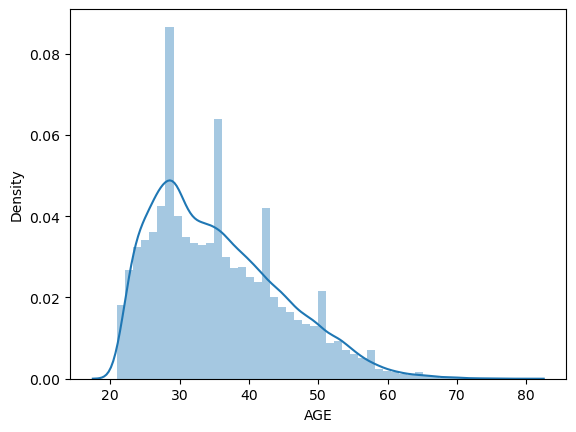

In [24]:
sns.distplot(df['AGE'], hist=True)


the data has more number of people under the age early 20 to 30 

In [25]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

AttributeError: 'Rectangle' object has no property 'hist'

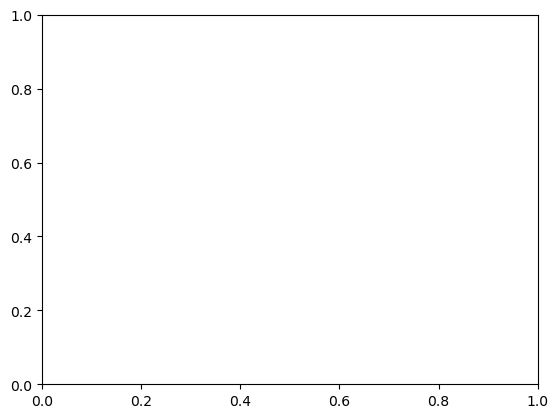

In [22]:
sns.barplot(df['EDUCATION'], hist=True)

0,5,6 are unknown so we can replace them with 4 which is others

In [26]:
df['EDUCATION']=df['EDUCATION'].replace([0,5,6],4)

see if education plays a role in defaulting or not

<AxesSubplot:xlabel='EDUCATION,default payment next month'>

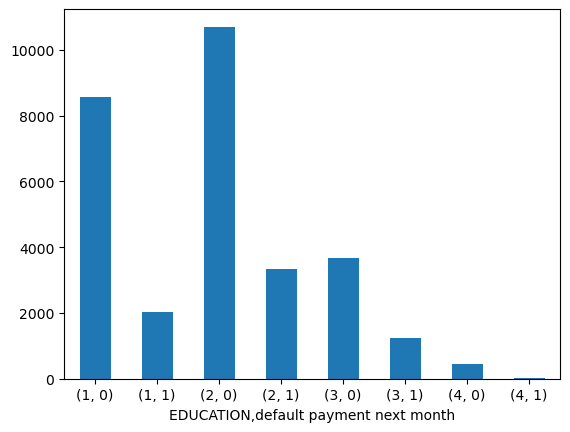

In [27]:
df['default payment next month'].groupby(df['EDUCATION']).value_counts().plot(kind='bar',rot=0)

1 = graduate school; 2 = university; 3 = high school; 4 = others

In [28]:
df['default payment next month'].groupby(df['EDUCATION']).value_counts()

EDUCATION  default payment next month
1          0                              8549
           1                              2036
2          0                             10700
           1                              3330
3          0                              3680
           1                              1237
4          0                               435
           1                                33
Name: default payment next month, dtype: int64

the percentage of people defaulting is varying at 25 to 30% for all modes of education.for others the % of default is less than 10%

In [29]:
df['default payment next month'].groupby(df['MARRIAGE']).value_counts()

MARRIAGE  default payment next month
1         0                             10453
          1                              3206
2         0                             12623
          1                              3341
3         0                               288
          1                                89
Name: default payment next month, dtype: int64

(1 = married; 2 = single; 3 = others).

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

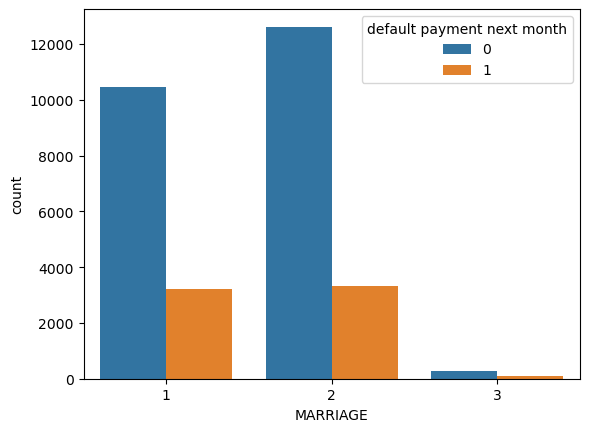

In [30]:
sns.countplot(x = df['MARRIAGE'], hue = 'default payment next month', data = df)

the % of people defaulting based on their martial status remains more or less the same.

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

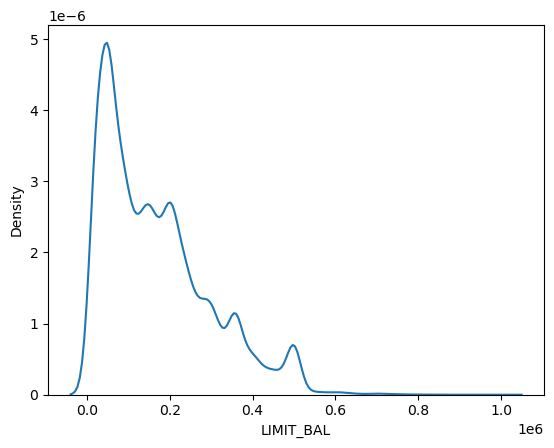

In [31]:
sns.distplot(df['LIMIT_BAL'], hist=False)

Group the data in three different age groups and then see the number of people who defaulted

In [32]:
df['lbl']=pd.cut(df['AGE'],4,labels=[1,2,3,4])

In [33]:
df['lbl']

0        1
1        1
2        1
3        2
4        3
        ..
29995    2
29996    2
29997    2
29998    2
29999    2
Name: lbl, Length: 30000, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

<AxesSubplot:>

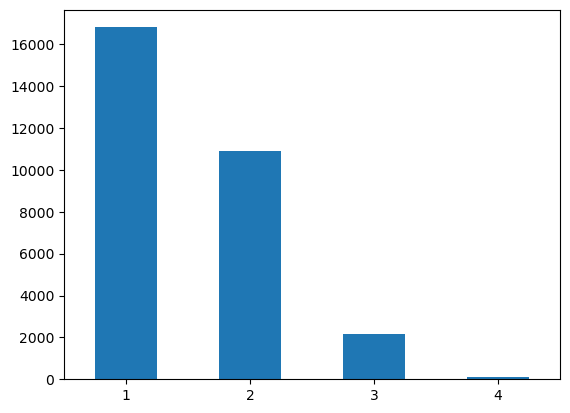

In [34]:
df['lbl'].value_counts()
df['lbl'].value_counts().plot(kind='bar',rot=0)

In [35]:
df['default payment next month'].groupby(df['lbl']).value_counts()


lbl  default payment next month
1    0                             13212
     1                              3597
2    0                              8460
     1                              2462
3    0                              1610
     1                               549
4    0                                82
     1                                28
Name: default payment next month, dtype: int64

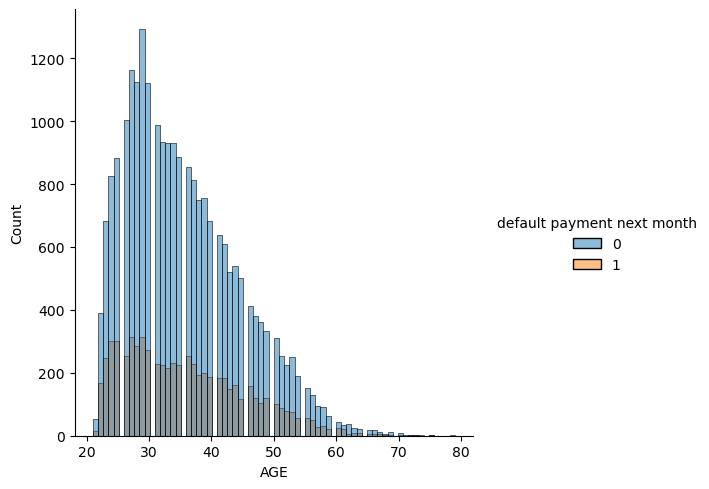

In [36]:
sns.displot(df, x=df["AGE"], hue="default payment next month")

In [37]:
df['lbl'].value_counts()

1    16809
2    10922
3     2159
4      110
Name: lbl, dtype: int64

the % of people defaulting is more or less the same in all age groups.people who are very younger and on the older side have higher possibility of default.

In [38]:
df["SEX"].groupby(df['lbl']).value_counts()


lbl  SEX
1    2      10658
     1       6151
2    2       6281
     1       4641
3    2       1123
     1       1036
4    1         60
     2         50
Name: SEX, dtype: int64

there are more women under the age group of 20 to 35 as to that of other age groups

In [39]:
df["MARRIAGE"].groupby(df['lbl']).value_counts()

lbl  MARRIAGE
1    2           12294
     1            4420
     3              95
2    1            7545
     2            3174
     3             203
3    1            1601
     2             480
     3              78
4    1              93
     2              16
     3               1
Name: MARRIAGE, dtype: int64

In [40]:
df["EDUCATION"].groupby(df['lbl']).value_counts()

lbl  EDUCATION
1    2            8126
     1            6725
     3            1712
     4             246
2    2            5113
     1            3316
     3            2308
     4             185
3    3             846
     2             763
     1             515
     4              35
4    3              51
     1              29
     2              28
     4               2
Name: EDUCATION, dtype: int64

1 = graduate school; 2 = university; 3 = high school; 4 = others

<AxesSubplot:xlabel='EDUCATION', ylabel='Density'>

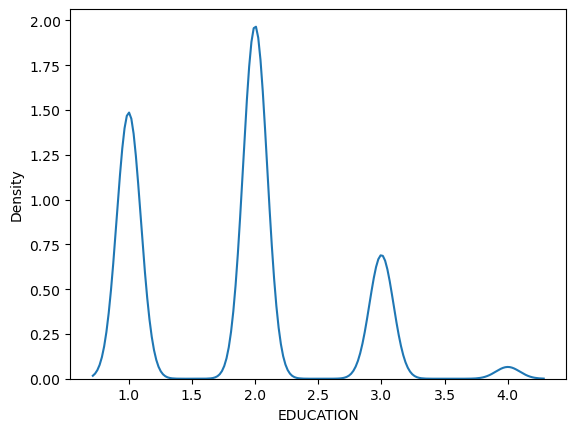

In [41]:
sns.distplot(df["EDUCATION"], hist=False)

In [43]:
df['default payment next month'].groupby(df['EDUCATION']).value_counts()

EDUCATION  default payment next month
1          0                              8549
           1                              2036
2          0                             10700
           1                              3330
3          0                              3680
           1                              1237
4          0                               435
           1                                33
Name: default payment next month, dtype: int64

In [44]:
1 = graduate school; 2 = university; 3 = high school; 4 = others

SyntaxError: cannot assign to literal (1266351390.py, line 1)

In [45]:
1237/(3680+1237),3330/(3330+10700),2036/(2036+8549),33/(435+33)

(0.2515761643278422,
 0.23734853884533144,
 0.19234766178554558,
 0.07051282051282051)

the same proprtion of people defaulted in all education levels. whereas for other education level, the default proportion is less

In [46]:
df['EDUCATION'].groupby(df['SEX']).value_counts()

SEX  EDUCATION
1    2            5374
     1            4354
     3            1990
     4             170
2    2            8656
     1            6231
     3            2927
     4             298
Name: EDUCATION, dtype: int64

In [47]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

1 = graduate school; 2 = university; 3 = high school; 4 = others

the proportion of men and women for different education levels tend to be same .

<AxesSubplot:xlabel='SEX', ylabel='count'>

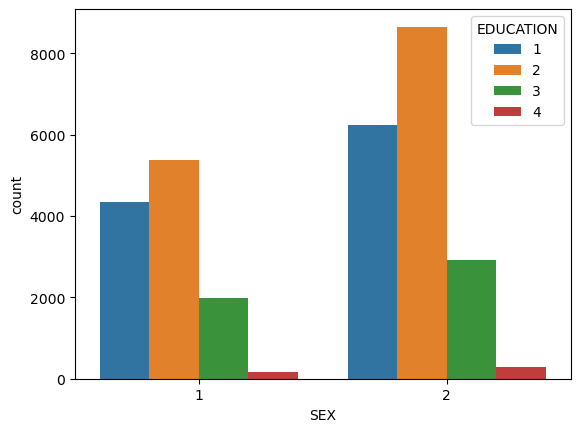

In [48]:
sns.countplot(x = df["SEX"], hue = 'EDUCATION', data = df)

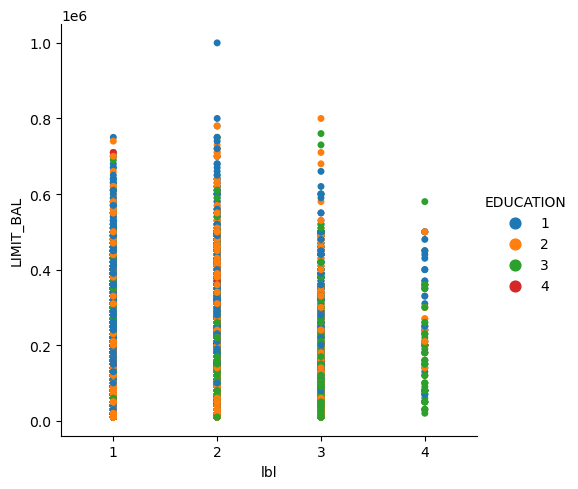

In [49]:
sns.catplot(data=df, x="lbl", y="LIMIT_BAL",hue="EDUCATION",jitter=False)

there are more number of people in graduate school in the age group 21 to 35 when comapred to other groups

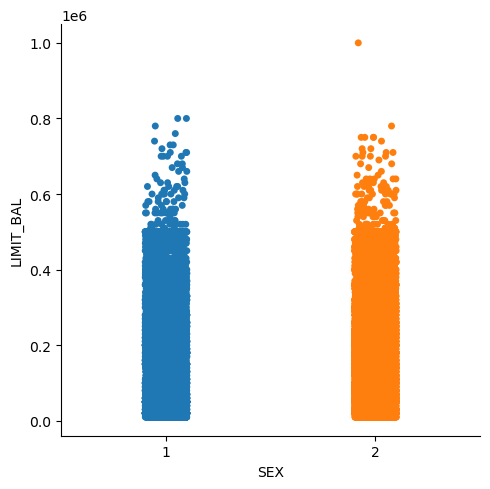

In [50]:
sns.catplot(data=df, x="SEX", y="LIMIT_BAL")

both men and women have similar level of limit balances upto 500K and there are less people having credit limit balance above 500k. And one lone women is having the credit limit balance of 1000K.

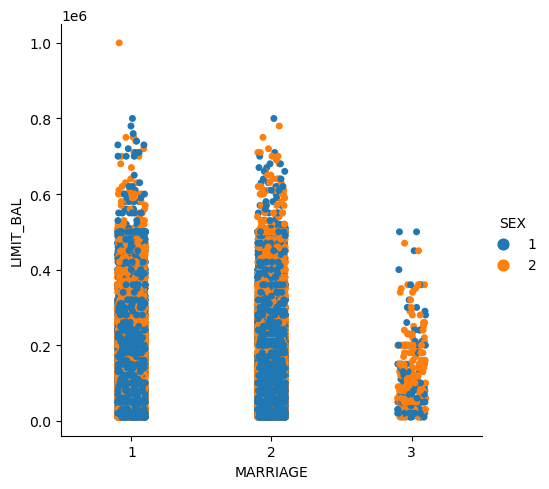

In [51]:
sns.catplot(data=df, x="MARRIAGE", y="LIMIT_BAL",hue="SEX")

Married people and single people have same level of credit balance.The women having the highest credit balance is married.
others tend to have a lesser credit balance

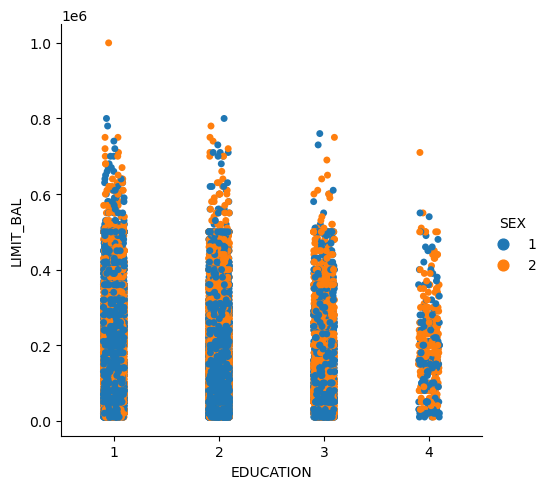

In [52]:
sns.catplot(data=df, x="EDUCATION", y="LIMIT_BAL",hue='SEX')

.Education: (1 = graduate school; 2 = university; 3 = high school; 4 = others).

people on graduate school,university and high school have same level of limit balances. while others have lesser balance limit.

In [53]:
df["Total Bill Amount"]=df["BILL_AMT1"]+df["BILL_AMT2"]+df["BILL_AMT3"]+df["BILL_AMT4"]+df["BILL_AMT5"]+df["BILL_AMT6"]

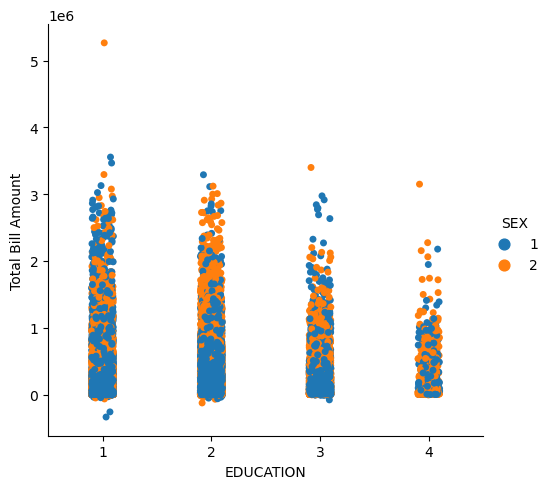

In [54]:
sns.catplot(data=df, x='EDUCATION', y="Total Bill Amount",hue="SEX")

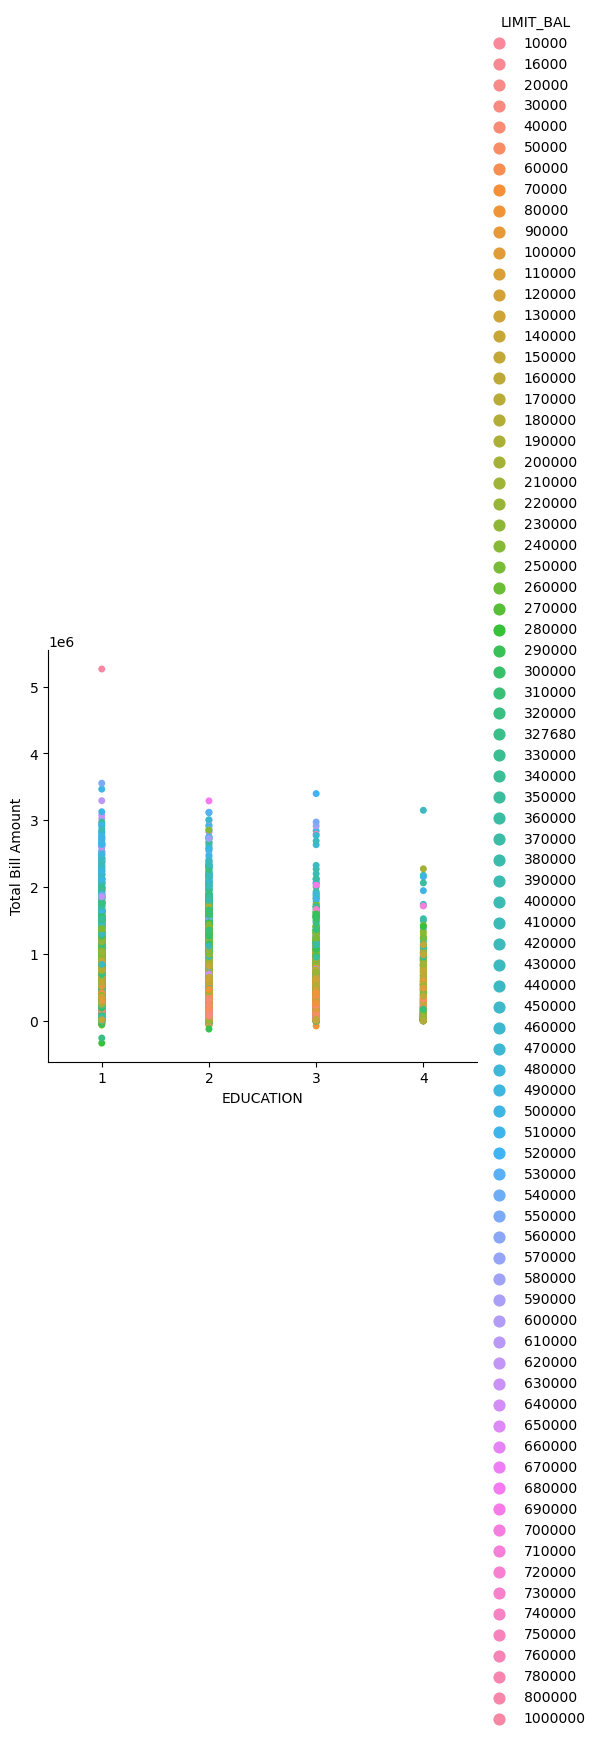

In [55]:
sns.catplot(data=df, x='EDUCATION', y="Total Bill Amount",hue="LIMIT_BAL",jitter=False)

people with bill amounts between 0 to 200K had had a limit balance between 200K to 400K. has the bill amount increased the people had varying limit balance between the maximum and minimum levels of limit balances.

In [56]:
df[["default payment next month","LIMIT_BAL"]].corr()

,default payment next month,LIMIT_BAL
default payment next month,1.00000,-0.15352
LIMIT_BAL,-0.15352,1.00000


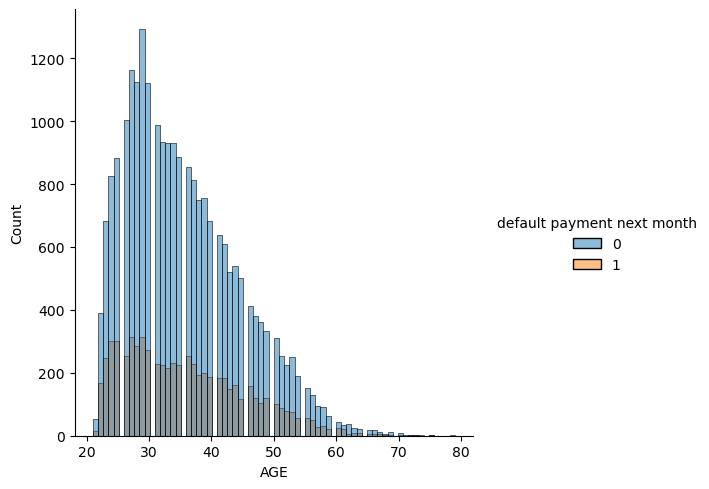

In [57]:
sns.displot(df, x=df["AGE"], hue="default payment next month")

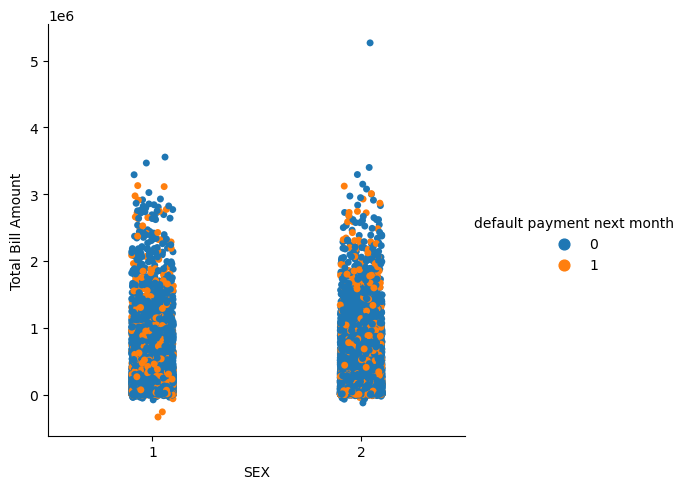

In [58]:
sns.catplot(data=df, x='SEX', y="Total Bill Amount",hue="default payment next month")

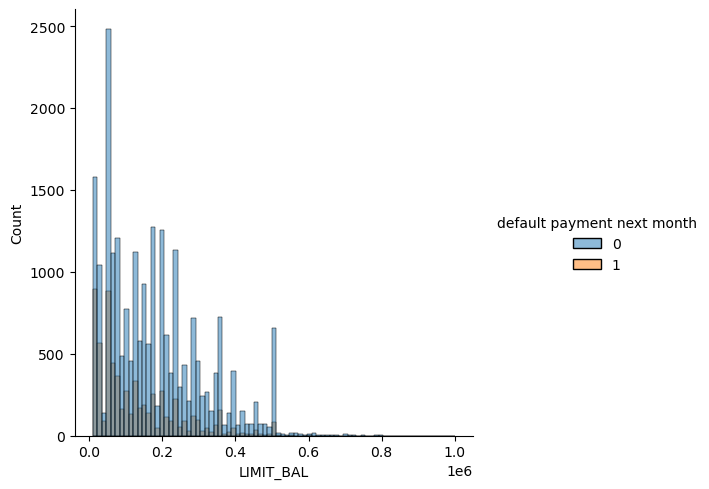

In [59]:
sns.displot(df, x=df["LIMIT_BAL"], hue="default payment next month")

In [60]:
df['label_bal']=pd.cut(df['LIMIT_BAL'],3,labels=[1,2,3])

<AxesSubplot:xlabel='label_bal', ylabel='count'>

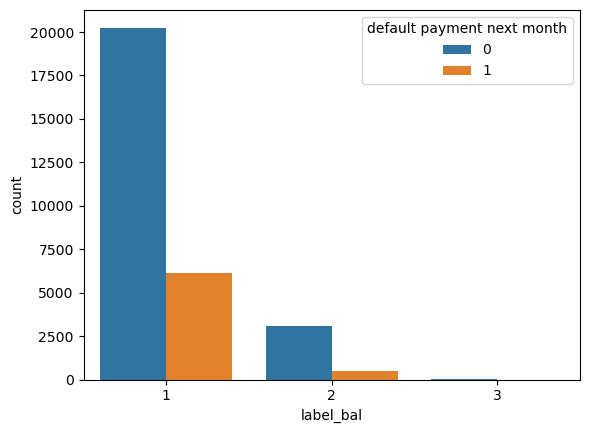

In [61]:
 sns.countplot(x = df["label_bal"], hue = 'default payment next month', data = df)

In [72]:
z=df['default payment next month'].groupby(df['label_bal']).value_counts()

<AxesSubplot:xlabel='EDUCATION', ylabel='AGE'>

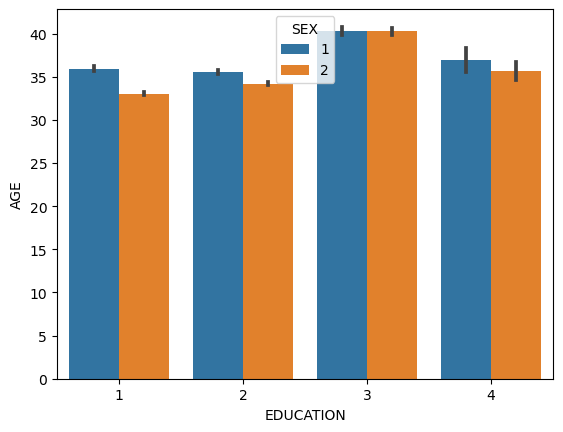

In [63]:

sns.barplot(data=df,x="EDUCATION",y="AGE",hue="SEX")

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

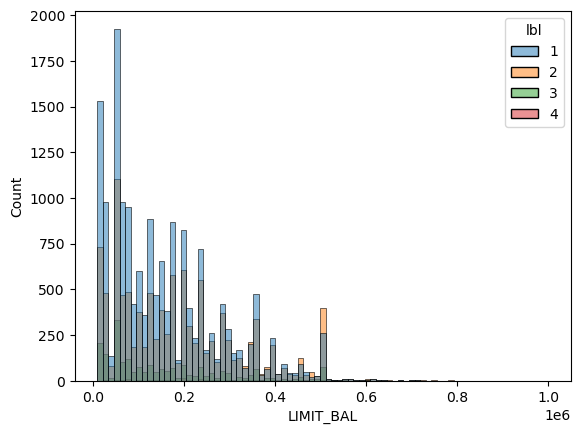

In [73]:
sns.histplot(df, x=df["LIMIT_BAL"], hue="lbl")

Let perform furture engineering on the feauture variables before training and testing the data using algorithms

lets create a variable X and assign all the features to it and a variable y and assign the label to it.

In [74]:
X=df[["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]
y=df["default payment next month"]

In [75]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


limit_bal,age,BILL_AMT0-6,PAY_AMT0-6 they would be minmax scaled.sex column whould be replaced with 0 and 1
target variable is alresy encoded.
I am going to minmax scale the above given features , test and train the model for accuracy. then perform one hot encoding 
on the education,marriage,PAY_0 to PAY_6 then again check for accuracy.

In [93]:
 from sklearn.preprocessing import MinMaxScaler
X_scale=df[["LIMIT_BAL","AGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]
scaler = MinMaxScaler()
scaler.fit(X_scale)
Xt_scale=scaler.transform(X_scale)


array(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], dtype=object)

In [94]:
Xt_scale=pd.DataFrame(Xt_scale,columns=scaler.get_feature_names_out())

In [95]:
Xt_scale

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892
29996,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000
29997,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864
29998,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412


In [96]:
X_scaled=pd.concat([Xt_scale, X[["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]], axis = 1)

In [80]:
X_scaled.rename(columns = {"SEX":14,"EDUCATION":15,"MARRIAGE":16,"PAY_0":17,"PAY_2":18,"PAY_3":19,"PAY_4":20,"PAY_5":21,"PAY_6":22}, inplace = True)

In [97]:
X_scaled[["SEX"]].value_counts

<bound method DataFrame.value_counts of        SEX
0        2
1        2
2        2
3        2
4        1
...    ...
29995    1
29996    1
29997    1
29998    1
29999    1

[30000 rows x 1 columns]>

In [98]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   AGE        30000 non-null  float64
 2   BILL_AMT1  30000 non-null  float64
 3   BILL_AMT2  30000 non-null  float64
 4   BILL_AMT3  30000 non-null  float64
 5   BILL_AMT4  30000 non-null  float64
 6   BILL_AMT5  30000 non-null  float64
 7   BILL_AMT6  30000 non-null  float64
 8   PAY_AMT1   30000 non-null  float64
 9   PAY_AMT2   30000 non-null  float64
 10  PAY_AMT3   30000 non-null  float64
 11  PAY_AMT4   30000 non-null  float64
 12  PAY_AMT5   30000 non-null  float64
 13  PAY_AMT6   30000 non-null  float64
 14  SEX        30000 non-null  int64  
 15  EDUCATION  30000 non-null  int64  
 16  MARRIAGE   30000 non-null  int64  
 17  PAY_0      30000 non-null  int64  
 18  PAY_2      30000 non-null  int64  
 19  PAY_3      30000 non-null  int64  
 20  PAY_4 

In [99]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 14)

In [102]:
X_train

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
3808,0.212121,0.241379,0.287111,0.222106,0.175168,0.316264,0.254988,0.283853,0.009158,0.003366,...,0.003783,1,1,2,0,0,0,0,0,0
24437,0.202020,0.241379,0.263285,0.194107,0.162710,0.292476,0.223086,0.373818,0.005724,0.003863,...,0.010422,1,2,2,0,0,0,0,0,0
6023,0.060606,0.862069,0.203745,0.129043,0.125254,0.211405,0.135735,0.298273,0.003624,0.003889,...,0.003231,2,3,1,0,0,0,2,0,0
3403,0.171717,0.051724,0.146519,0.099721,0.086894,0.160138,0.080648,0.261935,0.040410,0.000594,...,0.000000,2,3,2,1,-1,-1,-1,-2,-1
11535,0.313131,0.413793,0.179579,0.086905,0.092273,0.168802,0.082943,0.272119,0.025073,0.006431,...,0.055326,1,1,1,-2,-2,-2,-2,-2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22855,0.080808,0.172414,0.214901,0.145329,0.133139,0.241091,0.163622,0.329619,0.009158,0.002434,...,0.005864,2,1,2,0,0,2,2,2,2
18838,0.313131,0.103448,0.305920,0.249023,0.184288,0.330021,0.257972,0.401503,0.019575,0.000000,...,0.011349,2,2,2,0,0,2,0,0,0
9484,0.060606,0.086207,0.178079,0.083413,0.096445,0.176398,0.105359,0.260979,0.005724,0.010587,...,0.022078,1,1,2,0,0,0,-1,0,0
13656,0.191919,0.379310,0.272430,0.211117,0.167977,0.298144,0.230338,0.373602,0.016255,0.000000,...,0.020807,1,1,1,0,0,2,0,0,0


In [88]:
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train, y_train)  
pred=model.predict(X_train) 
accuracy_train = np.sum(y_train== pred) / len(y_train)
print(accuracy_train)
pred=model.predict(X_test) 
accuracy_test = np.sum(y_test== pred) / len(y_test)
print(accuracy_test)

0.832
0.8068888888888889


In [117]:
S=22
E=30
K_list=list()
ac_train=list()
ac_test=list()
ac_diff=list()
precision=list()
recall=list()
TP=list()
TN=list()
FP=list()
FN=list()
TPR=list()
FPR=list()
for i in range(S,E):
    model = KNeighborsClassifier(n_neighbors = i)
    K_list.append(i)
    model.fit(X_train, y_train)  
    pred=model.predict(X_train) 
    accuracy_train = np.sum(y_train== pred) / len(y_train)
    ac_train.append(accuracy_train)
    pred=model.predict(X_test) 
    accuracy_test = np.sum(y_test== pred) / len(y_test)
    ac_test.append(accuracy_test)
    diff=accuracy_train-accuracy_test
    ac_diff.append(diff)
    z=confusion_matrix(y_test, pred)
    precision.append(z[0,0] / (z[0,0] + z[1,0]))
    recall.append(z[0,0] / (z[0,0] + z[1,1]))
    TP.append(z[0,0])
    TN.append(z[0,1])
    FP.append(z[1,0])
    FN.append(z[1,1])
    TPR.append(z[0,0]/(z[0,0]+z[1,1]))
    FPR.append(z[1,0]/(z[1,0]+z[0,1]))
    
        
cm={"K-Value":K_list,"TP":TP,"TN":TN,"FP":FP,"FN":FN,"TPR":TPR,"FPR":FPR}
ConfusionMatrix=pd.DataFrame(cm)
dafr={"K-Value":K_list,"Accuracy of train data":ac_train,"Accuracy of test data":ac_test,"Difference in accuracy":ac_diff,"Recall":recall,"Precision":precision}
data_of_K=pd.DataFrame(dafr)
data_of_K

,K-Value,Accuracy of train data,Accuracy of test data,Difference in accuracy,Recall,Precision
0,22,0.827952,0.808667,0.019286,0.905469,0.826643
1,23,0.827524,0.808111,0.019413,0.901279,0.829012
2,24,0.826762,0.810111,0.016651,0.904128,0.827829
3,25,0.826524,0.810667,0.015857,0.899534,0.830759
4,26,0.826810,0.810667,0.016143,0.904057,0.828019
5,27,0.826095,0.809556,0.016540,0.900494,0.829876
6,28,0.825429,0.809667,0.015762,0.905036,0.827167
7,29,0.825857,0.810444,0.015413,0.899781,0.830549


In [ ]:
ConfusionMatrix

In [ ]:
plt.figure(figsize=(25,3))

plt.plot(data_of_K["K-Value"],data_of_K["Recall"] )
plt.xlabel('Value of K for KNN')
plt.ylabel('Recall')
plt.show()

In [ ]:
plt.figure(figsize=(25,3))

plt.plot(data_of_K["K-Value"],data_of_K["Accuracy of test data"] )

plt.plot(data_of_K["K-Value"],data_of_K["Accuracy of train data"] )
plt.legend(["Test_data", "Train_data"], loc=0, frameon=True)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracies')
plt.show()

After analyzing different range of K values, post a k value of 15 the difference in accuracy of the test and train data has stabilized the accuracy for train and test data after this point is around 0.82 and 0.80 respectively.
At the K-value of 40 , the difference between the test and train dataset has reached a value less than 0.011.
so the k value of 40 should be considered as a good number for a good accuracy on test and train data

In [ ]:
plt.figure(figsize=(25,3))

plt.plot(data_of_K["K-Value"],data_of_K["Recall"] )
plt.plot(data_of_K["K-Value"],data_of_K["Precision"] )
plt.legend(["Recall", "Precision"], loc=0, frameon=True)
plt.xlabel('Value of K for KNN')
plt.ylabel('Precision and Recall')
plt.show()


The False positives tend to be on the higher side. It the classifier is wrongly predicting higher number of non defaulters as defaulters. whereas it has predicted a good number of defaulters. 
The algorithm has done a good prediction on the defaulters but not on the non defaulters.


In [ ]:
df

In [90]:
X[["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,1,2,2,-1,-1,-2,-2
1,2,2,2,-1,2,0,0,0,2
2,2,2,2,0,0,0,0,0,0
3,2,2,1,0,0,0,0,0,0
4,1,2,1,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...
29995,1,3,1,0,0,0,0,0,0
29996,1,3,2,-1,-1,-1,-1,0,0
29997,1,2,2,4,3,2,-1,0,0
29998,1,3,1,1,-1,0,0,0,-1


In [104]:

X_enc = pd.get_dummies(X, columns = ["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"])
X_enc


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,...,0,0,1,0,0,0,0,0,0,0
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,...,0,0,1,0,0,0,0,0,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,...,0,0,1,0,0,0,0,0,0,0
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,...,0,1,0,0,0,0,0,0,0,0


In [105]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X_enc, y, test_size = 0.3, random_state = 14)

In [107]:
S=20
E=30
K_list=list()
ac_train=list()
ac_test=list()
ac_diff=list()
precision=list()
recall=list()
TP=list()
TN=list()
FP=list()
FN=list()
TPR=list()
FPR=list()
for i in range(S,E):
    model = KNeighborsClassifier(n_neighbors = i)
    K_list.append(i)
    model.fit(X_Train, y_Train)  
    pred=model.predict(X_Train) 
    accuracy_train = np.sum(y_Train== pred) / len(y_Train)
    ac_train.append(accuracy_train)
    pred=model.predict(X_Test) 
    accuracy_test = np.sum(y_Test== pred) / len(y_Test)
    ac_test.append(accuracy_test)
    diff=accuracy_train-accuracy_test
    ac_diff.append(diff)
    z=confusion_matrix(y_Test, pred)
    precision.append(z[0,0] / (z[0,0] + z[1,0]))
    recall.append(z[0,0] / (z[0,0] + z[1,1]))
    TP.append(z[0,0])
    TN.append(z[0,1])
    FP.append(z[1,0])
    FN.append(z[1,1])
    TPR.append(z[0,0]/(z[0,0]+z[1,1]))
    FPR.append(z[1,0]/(z[1,0]+z[0,1]))
    
        
cm={"K-Value":K_list,"TP":TP,"TN":TN,"FP":FP,"FN":FN,"TPR":TPR,"FPR":FPR}
ConfusionMatrix=pd.DataFrame(cm)
dafr={"K-Value":K_list,"Accuracy of train data":ac_train,"Accuracy of test data":ac_test,"Difference in accuracy":ac_diff,"Recall":recall,"Precision":precision}
data_of_K=pd.DataFrame(dafr)
data_of_K

,K-Value,Accuracy of train data,Accuracy of test data,Difference in accuracy,Recall,Precision
0,20,0.790429,0.772000,0.018429,0.974813,0.781380
1,21,0.789762,0.771889,0.017873,0.970923,0.783119
2,22,0.789143,0.772333,0.016810,0.976694,0.780614
3,23,0.788857,0.771333,0.017524,0.972054,0.782468
4,24,0.788524,0.773000,0.015524,0.977577,0.780379
5,25,0.788619,0.771000,0.017619,0.974060,0.781478
6,26,0.787762,0.772889,0.014873,0.979011,0.779711
7,27,0.787048,0.770667,0.016381,0.975923,0.780558
8,28,0.787619,0.770556,0.017063,0.979380,0.778988
9,29,0.787476,0.770444,0.017032,0.976781,0.780120


In [108]:
 from sklearn.preprocessing import MinMaxScaler
X_scale=df[["LIMIT_BAL","AGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]
scaler = MinMaxScaler()
scaler.fit(X_scale)
Xt_scale=scaler.transform(X_scale)
Xt_scale=pd.DataFrame(Xt_scale)
Xt_scale

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,...,0.000000,1.0,0.333333,0.0,0.4,0.4,0.1,0.1,0.0,0.0
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,...,0.003783,1.0,0.333333,0.5,0.1,0.4,0.2,0.2,0.2,0.4
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,...,0.009458,1.0,0.333333,0.5,0.2,0.2,0.2,0.2,0.2,0.2
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,...,0.001892,1.0,0.333333,0.0,0.2,0.2,0.2,0.2,0.2,0.2
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,...,0.001284,0.0,0.333333,0.0,0.1,0.2,0.1,0.2,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,...,0.001892,0.0,0.666667,0.0,0.2,0.2,0.2,0.2,0.2,0.2
29996,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,...,0.000000,0.0,0.666667,0.5,0.1,0.1,0.1,0.1,0.2,0.2
29997,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,...,0.005864,0.0,0.333333,0.5,0.6,0.5,0.4,0.1,0.2,0.2
29998,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,...,0.003412,0.0,0.666667,0.0,0.3,0.1,0.2,0.2,0.2,0.1


In [113]:
y=df["default payment next month"]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 14)

In [116]:
S=20
E=30
K_list=list()
ac_train=list()
ac_test=list()
ac_diff=list()
precision=list()
recall=list()
TP=list()
TN=list()
FP=list()
FN=list()
TPR=list()
FPR=list()
for i in range(S,E):
    model = KNeighborsClassifier(n_neighbors = i)
    K_list.append(i)
    model.fit(X_train, y_train)  
    pred=model.predict(X_train) 
    accuracy_train = np.sum(y_train== pred) / len(y_train)
    ac_train.append(accuracy_train)
    pred=model.predict(X_test) 
    accuracy_test = np.sum(y_test== pred) / len(y_test)
    ac_test.append(accuracy_test)
    diff=accuracy_train-accuracy_test
    ac_diff.append(diff)
    z=confusion_matrix(y_test, pred)
    precision.append(z[0,0] / (z[0,0] + z[1,0]))
    recall.append(z[0,0] / (z[0,0] + z[1,1]))
    TP.append(z[0,0])
    TN.append(z[0,1])
    FP.append(z[1,0])
    FN.append(z[1,1])
    TPR.append(z[0,0]/(z[0,0]+z[1,1]))
    FPR.append(z[1,0]/(z[1,0]+z[0,1]))
    
        
cm={"K-Value":K_list,"TP":TP,"TN":TN,"FP":FP,"FN":FN,"TPR":TPR,"FPR":FPR}
ConfusionMatrix=pd.DataFrame(cm)
dafr={"K-Value":K_list,"Accuracy of train data":ac_train,"Accuracy of test data":ac_test,"Difference in accuracy":ac_diff,"Recall":recall,"Precision":precision}
data_of_K=pd.DataFrame(dafr)
data_of_K

,K-Value,Accuracy of train data,Accuracy of test data,Difference in accuracy,Recall,Precision
0,20,0.826619,0.809778,0.016841,0.905324,0.827024
1,21,0.827762,0.809444,0.018317,0.900618,0.829771
2,22,0.827952,0.808667,0.019286,0.905469,0.826643
3,23,0.827524,0.808111,0.019413,0.901279,0.829012
4,24,0.826762,0.810111,0.016651,0.904128,0.827829
5,25,0.826524,0.810667,0.015857,0.899534,0.830759
6,26,0.826810,0.810667,0.016143,0.904057,0.828019
7,27,0.826095,0.809556,0.016540,0.900494,0.829876
8,28,0.825429,0.809667,0.015762,0.905036,0.827167
9,29,0.825857,0.810444,0.015413,0.899781,0.830549


In [4]:
 from sklearn.preprocessing import MinMaxScaler
X_scale=df[["LIMIT_BAL","AGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]
scaler = MinMaxScaler()
scaler.fit(X_scale)
Xt_scale=scaler.transform(X_scale)
Xt_scale=pd.DataFrame(Xt_scale)
Xt_scale

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,...,0.000000,1.0,0.333333,0.333333,0.4,0.4,0.1,0.1,0.0,0.0
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,...,0.003783,1.0,0.333333,0.666667,0.1,0.4,0.2,0.2,0.2,0.4
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,...,0.009458,1.0,0.333333,0.666667,0.2,0.2,0.2,0.2,0.2,0.2
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,...,0.001892,1.0,0.333333,0.333333,0.2,0.2,0.2,0.2,0.2,0.2
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,...,0.001284,0.0,0.333333,0.333333,0.1,0.2,0.1,0.2,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,...,0.001892,0.0,0.500000,0.333333,0.2,0.2,0.2,0.2,0.2,0.2
29996,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,...,0.000000,0.0,0.500000,0.666667,0.1,0.1,0.1,0.1,0.2,0.2
29997,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,...,0.005864,0.0,0.333333,0.666667,0.6,0.5,0.4,0.1,0.2,0.2
29998,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,...,0.003412,0.0,0.500000,0.333333,0.3,0.1,0.2,0.2,0.2,0.1


In [6]:
import statsmodels.api as sm
X = Xt_scale
X = sm.add_constant(X)
y = df["default payment next month"]

In [7]:
model = sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.464620
         Iterations 8


In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29976
Method:                                   MLE   Df Model:                           23
Date:                        Mon, 01 May 2023   Pseudo R-squ.:                  0.1207
Time:                                19:58:25   Log-Likelihood:                -13939.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8659      0.365     -5.118      0.000      -2.580      -1.151
0             -0.7547      0.155     -4.859      0.000      -1.059      -0.450
1              0.4303      0.103      4.170      0.000       0.228       0.633
2             -6.2069      1.284     -4.835      0.000      -8.723      -3.691
3              2.4829      1.585      1.566      0.117      -0.624       5.590
4              2.4864      2.409      1.032      0.302      -2.236       7.209
5             -0.1933      1.432     -0.135      0.893      -3.000       2.614
6              0.6207      1.531      0.405      0.685      -2.381       3.622
7              0.5124      1.555      0.330      0.742      -2.535       3.560
8            -11.9079      2.014     -5.913      0.000     -15.855      -7.961
9            -16.1954      3.528     -4.590      0.000     -23.110      -9.280
10            -2.4567      1.543     -1.592      0.111      -5.482       0.568
11            -2.4986      1.108     -2.254      0.024      -4.671      -0.326
12            -1.4123      0.758     -1.864      0.062      -2.898       0.073
13            -1.0912      0.685     -1.593      0.111      -2.434       0.252
14            -0.1087      0.031     -3.541      0.000      -0.169      -0.049
15            -0.6095      0.126     -4.844      0.000      -0.856      -0.363
16            -0.4631      0.095     -4.869      0.000      -0.649      -0.277
17             5.7741      0.177     32.632      0.000       5.427       6.121
18             0.8282      0.202      4.103      0.000       0.433       1.224
19             0.7214      0.226      3.192      0.001       0.278       1.164
20             0.2389      0.250      0.956      0.339      -0.251       0.729
21             0.3401      0.269      1.266      0.206      -0.187       0.867
22             0.0804      0.221      0.363      0.716      -0.353       0.514
==============================================================================
"""

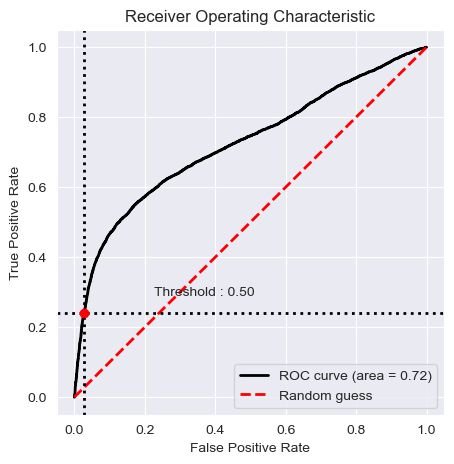

In [9]:
bc = BinaryClassification(y, model.predict(X), labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [10]:
df['prob'] = model.predict(X)
df[df.prob < 0.5]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,prob
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,0.150024
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0.200426
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0.242773
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0.137759
5,6,50000,1,1,2,37,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,0.239523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,29994,100000,1,1,2,38,0,-1,-1,0,...,69473,55004,2000,111784,4000,3000,2000,2000,0,0.107975
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,0.144965
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,0.114794
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,0.167531


In [11]:
threshold = 0.5
# create an empty array
pred_class = np.zeros(len(y), dtype=int)
for i in np.arange(len(y)):
    if (df.prob[i] > threshold):
        pred_class[i] = 1
    else:
        pred_class[i] = 0
print(pred_class)

[1 0 0 ... 1 0 0]


In [12]:
# TP when y=1 and pred_class=1
TP = sum((y==1) & (pred_class == 1))

# TN when y=0 and pred_class=0
TN = sum((y==0) & (pred_class == 0))

# FP when y=0 and pred_class=1
FP = sum((y==0) & (pred_class == 1))

# FN when y=1 and pred_class=0
FN = sum((y==1) & (pred_class == 0))

In [13]:
TP,TN,FP,FN

(1595, 22734, 630, 5041)

In [14]:
df_roc = pd.DataFrame()
# run this in a loop varying threshold and store outputs in a df
threshold = 0.5

threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for thresh in threshold:
    # create an empty array
    pred_class = np.zeros(len(y), dtype=int)
    for i in np.arange(len(y)):
        if (df.prob[i] > thresh):
            pred_class[i] = 1
        else:
            pred_class[i] = 0

            # TP when y=1 and pred_class=1
    TP = sum((y==1) & (pred_class == 1))

    # TN when y=0 and pred_class=0
    TN = sum((y==0) & (pred_class == 0))

    # FP when y=0 and pred_class=1
    FP = sum((y==0) & (pred_class == 1))

    # FN when y=1 and pred_class=0
    FN = sum((y==1) & (pred_class == 0))
    
    roc_dict = {'threshold':thresh,'TP':TP,'TN':TN,'FP':FP,'FN':FN}
    df_roc = df_roc.append(roc_dict,ignore_index=True)

In [15]:
df_roc

,threshold,TP,TN,FP,FN
0,0.0,6636.0,0.0,23364.0,0.0
1,0.1,6026.0,4880.0,18484.0,610.0
2,0.2,4654.0,13883.0,9481.0,1982.0
3,0.3,3097.0,21023.0,2341.0,3539.0
4,0.4,2541.0,21978.0,1386.0,4095.0
5,0.5,1595.0,22734.0,630.0,5041.0
6,0.6,714.0,23113.0,251.0,5922.0
7,0.7,284.0,23265.0,99.0,6352.0
8,0.8,114.0,23310.0,54.0,6522.0
9,0.9,35.0,23337.0,27.0,6601.0


In [16]:
df_roc['TPR'] = df_roc.TP / (df_roc.TP+df_roc.FN)
df_roc['FPR'] = df_roc.FP / (df_roc.TN+df_roc.FP)

In [17]:
df_roc

,threshold,TP,TN,FP,FN,TPR,FPR
0,0.0,6636.0,0.0,23364.0,0.0,1.000000,1.000000
1,0.1,6026.0,4880.0,18484.0,610.0,0.908077,0.791132
2,0.2,4654.0,13883.0,9481.0,1982.0,0.701326,0.405795
3,0.3,3097.0,21023.0,2341.0,3539.0,0.466697,0.100197
4,0.4,2541.0,21978.0,1386.0,4095.0,0.382911,0.059322
5,0.5,1595.0,22734.0,630.0,5041.0,0.240356,0.026965
6,0.6,714.0,23113.0,251.0,5922.0,0.107595,0.010743
7,0.7,284.0,23265.0,99.0,6352.0,0.042797,0.004237
8,0.8,114.0,23310.0,54.0,6522.0,0.017179,0.002311
9,0.9,35.0,23337.0,27.0,6601.0,0.005274,0.001156


In [4]:
df[["LIMIT_BAL","AGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,2,2,1,2,2,-1,-1,-2,-2
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,2000,2,2,2,-1,2,0,0,0,2
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,5000,2,2,2,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,1000,2,2,1,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,679,1,2,1,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,...,1000,1,3,1,0,0,0,0,0,0
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,...,0,1,3,2,-1,-1,-1,-1,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,...,3100,1,2,2,4,3,2,-1,0,0
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,...,1804,1,3,1,1,-1,0,0,0,-1


In [8]:
df[["BILL_AMT1"]].min()

BILL_AMT1   -165580
dtype: int64